<a href="https://colab.research.google.com/github/PintoPaola/Inteligencia-Artificial/blob/main/Final/final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from sklearn.datasets import make_blobs #Para generar conjuntos de datos simulados con una distribución específica
import numpy as np #para el manejo de matrices y vectores

# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat


import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split
%matplotlib inline

In [31]:
dataframe = pd.read_csv("/content/gdrive/MyDrive/IA/DATASET/dataset_0.csv", sep=",")
print(dataframe)

         0    1    2    3    4    5    6    7    8    9  ...  3062  3063  \
0      255  255  255  255  255  255  255  255  255  255  ...   255   255   
1      166  218  221  166  218  221  166  218  221  166  ...   255   255   
2       86  185  103   86  185  103   86  185  103   86  ...   255   255   
3      246  142  226  246  142  226  246  142  226  246  ...   255   255   
4      144    1  194  144    1  194  144    1  194  144  ...   255   255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
49995  211   14   11  255  255  255  211   14   11  255  ...   255   255   
49996  190  236  164  190  236  164  190  236  164  190  ...   255   255   
49997  218  215  249  218  215  249  255  255  255  255  ...   255   255   
49998  255  255  255  255  255  255  255  255  255  255  ...   255   255   
49999  255  255  255  255  255  255  255  255  255  255  ...   255   255   

       3064  3065  3066  3067  3068  3069  3070  3071  
0       255   255   255   255  

Comprobamos si existen valores nulos

In [32]:
print(dataframe.isnull().any())

0       False
1       False
2       False
3       False
4       False
        ...  
3067    False
3068    False
3069    False
3070    False
3071    False
Length: 3072, dtype: bool


Comprobamos si existen valores no numéricos

In [33]:
# Verificar si hay valores no numéricos
non_numeric_columns = dataframe.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any()
print("Valores no numéricos en las columnas:")
print(non_numeric_columns)


Valores no numéricos en las columnas:
0       False
1       False
2       False
3       False
4       False
        ...  
3067    False
3068    False
3069    False
3070    False
3071    False
Length: 3072, dtype: bool


In [35]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar datos desde un archivo CSV
data = np.loadtxt('/content/gdrive/MyDrive/IA/DATASET/dataset_0.csv', delimiter=',')

# Seleccionar todas las columnas para X
X = data[:, :]

# Calcular el tamaño del conjunto de prueba (80% para entrenamiento, 20% para prueba)
test_size = 0.2
num_samples = len(X)
num_test = int(num_samples * test_size)
num_train = num_samples - num_test

# Dividir el conjunto en entrenamiento y prueba
X_train = X[:num_test]
X_test = X[num_test:]

# Verificar las dimensiones de los conjuntos resultantes
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)


Dimensiones del conjunto de entrenamiento: (10000, 3072)
Dimensiones del conjunto de prueba: (40001, 3072)


In [9]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X_train)

def  testNormalize(X, mu, sigma):
    X_norm = X.copy()
    X_norm = (X - mu) / sigma
    m, n = X_norm.shape
    return X_norm

X_test = testNormalize(X_test, mu, sigma)

In [10]:

print(X.shape)

(10000, 3072)


Calculamos varias veces los clusters que se están formando a partir de los datos con distintos inicios de randomización

In [11]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, ..., 3, 0, 1], dtype=int32)

In [12]:
kmeans.cluster_centers_

array([[ 1.37442794e-01,  1.22755652e-01,  1.35581165e-01, ...,
        -8.11728968e-03, -6.27437794e-03, -6.47425378e-03],
       [-6.67358184e-01, -6.45400788e-01, -6.97567557e-01, ...,
        -3.43826193e-03, -3.18391987e-03, -1.72513442e-03],
       [-2.09189009e+00, -2.06013967e+00, -2.03096211e+00, ...,
         9.83224669e+01,  9.80573678e+01,  9.75480444e+01],
       [-6.23067206e-01, -5.83907199e-01, -6.11794146e-01, ...,
        -3.43826193e-03, -3.18391987e-03, -1.72513442e-03],
       [ 9.16441712e-01,  9.23956602e-01,  9.27926425e-01, ...,
        -4.43403347e-02, -5.98500169e-02, -6.22723931e-02]])

In [13]:

kmeans.predict(X_test)

array([0, 0, 0, ..., 0, 4, 0], dtype=int32)

In [14]:

import matplotlib.pyplot as plt

In [15]:
kmeans.transform(X_test)

array([[  20.98508332,   89.30722537, 2275.49948862,   46.73443757,
          57.98403831],
       [  16.42542573,   86.13862947, 2273.8462696 ,   40.06552362,
          57.3285205 ],
       [  36.76216891,   87.2013153 , 2280.17804423,   55.47257988,
          49.04230377],
       ...,
       [   9.11619738,   88.4417034 , 2273.00748764,   42.70687047,
          55.99632204],
       [  69.16754193,   84.96245669, 2293.30622988,   77.1961911 ,
          55.24743111],
       [  66.21174324,   97.45349396, 2281.91152358,   75.80815266,
          76.4122907 ]])

In [16]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)

In [36]:
np.random.seed(42)
random_indices = np.random.choice(X.shape[0], size=1000, replace=False)
X_selected = X[random_indices]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


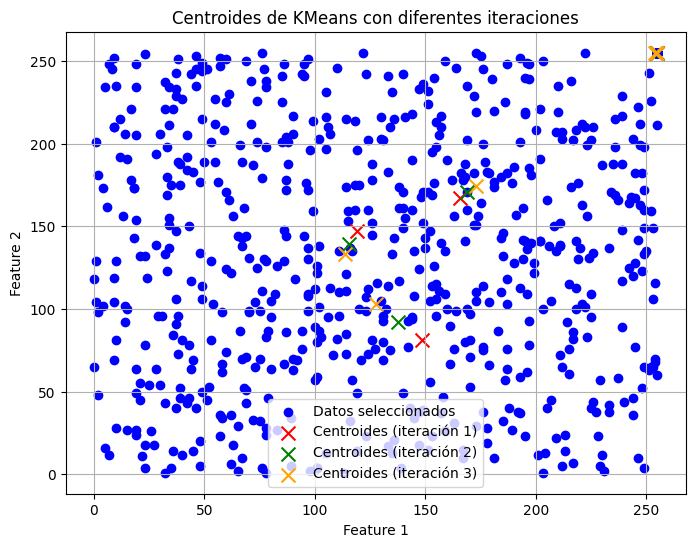

In [37]:
kmeans_iter1.fit(X_selected)
kmeans_iter2.fit(X_selected)
kmeans_iter3.fit(X_selected)

# Obtener los centroides de cada modelo
centroids_iter1 = kmeans_iter1.cluster_centers_
centroids_iter2 = kmeans_iter2.cluster_centers_
centroids_iter3 = kmeans_iter3.cluster_centers_

# Crear un diagrama de dispersión y graficar los centroides
plt.figure(figsize=(8, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c='blue', label='Datos seleccionados')
plt.scatter(centroids_iter1[:, 0], centroids_iter1[:, 1], marker='x', s=100, c='red', label='Centroides (iteración 1)')
plt.scatter(centroids_iter2[:, 0], centroids_iter2[:, 1], marker='x', s=100, c='green', label='Centroides (iteración 2)')
plt.scatter(centroids_iter3[:, 0], centroids_iter3[:, 1], marker='x', s=100, c='orange', label='Centroides (iteración 3)')
plt.title('Centroides de KMeans con diferentes iteraciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [19]:

kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=5, n_init=10,
       random_state=11)

In [20]:
def plot_clusterer_comparison(model1, model2, X, title1, title2):
    plt.figure(figsize=(12, 5))

    # Modelo 1
    plt.subplot(1, 2, 1)
    y_pred1 = model1.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred1, cmap='viridis')
    plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], s=300, c='red', marker='X')
    plt.title(title1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Modelo 2
    plt.subplot(1, 2, 2)
    y_pred2 = model2.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred2, cmap='viridis')
    plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=300, c='red', marker='X')
    plt.title(title2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


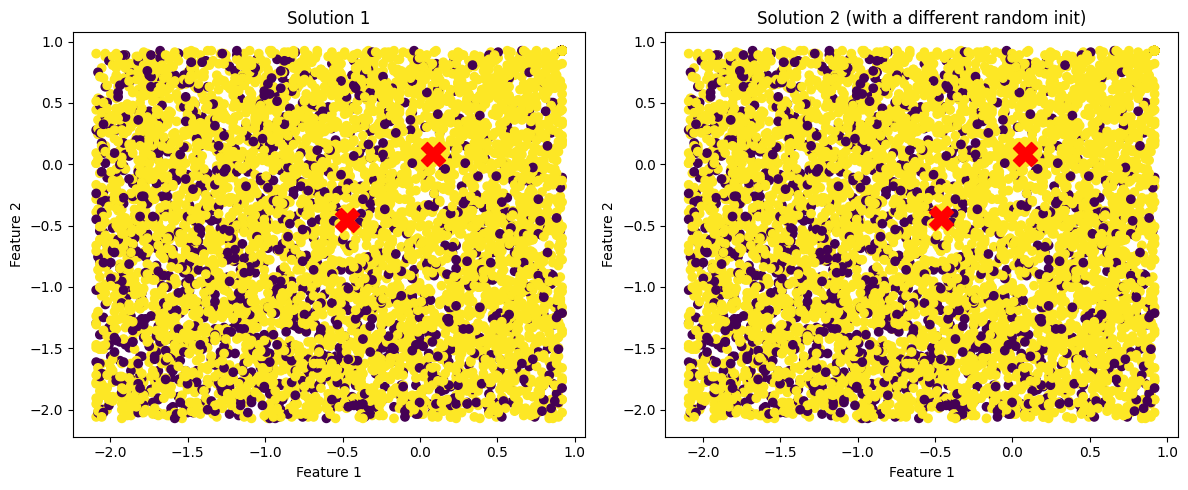

In [21]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [22]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=2, n_init=10,
       random_state=11)

In [23]:
def plot_kmeans_multi_init(model, X):
    plt.figure(figsize=(8, 6))

    # Visualizar los datos
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis', alpha=0.6)

    # Visualizar los centroides
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
                marker='x', s=300, c='red', label='Centroids')

    plt.title('KMeans with Multiple Random Initializations')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

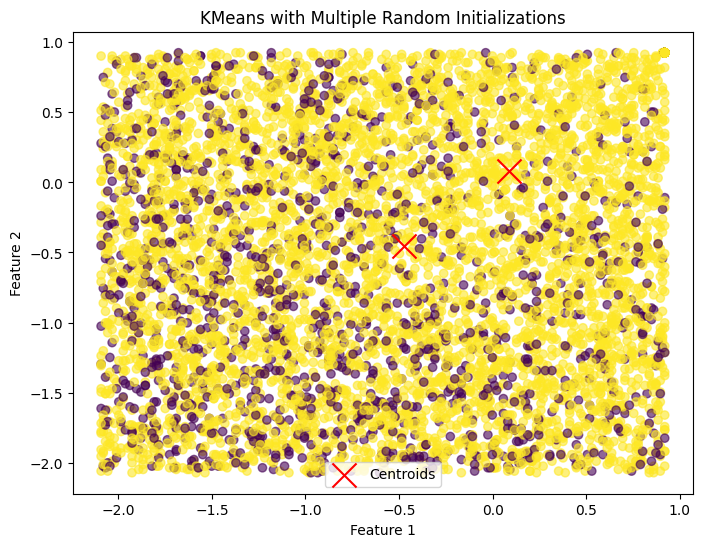

In [24]:
plot_kmeans_multi_init(kmeans_rnd_10_inits, X)


### **Encontrando el número óptimo de grupos**
Como encontrar elnumero optimo de grupos o cluster y para eso usamos el silhouette score. Esta métrica evalúa qué tan cerca está cada muestra de los otros puntos en el mismo cluster y qué tan lejos está de los puntos de los clusters vecinos más cercanos. Un coeficiente de silueta cercano a 1 indica que la muestra está bien clasificada en su cluster, cerca de 0 indica que está cerca del límite entre clusters y cerca de -1 indica que podría estar en el cluster equivocado

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.2446963576828523

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

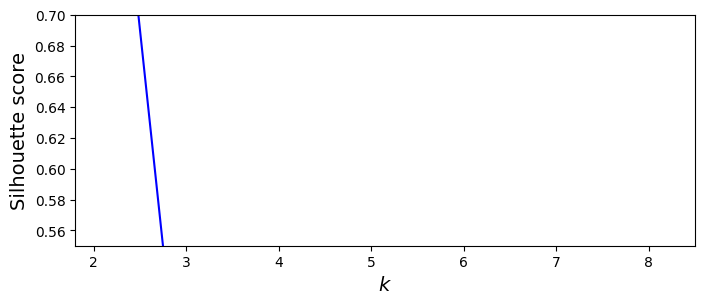

In [26]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [30]:
print(silhouette_scores)

[0.9724068543932781, 0.40841043358975365, 0.39127986522774766, 0.2446963576828523, 0.15662571078153337, 0.17085088858326394, 0.17187575544675696, 0.15874810516807933]


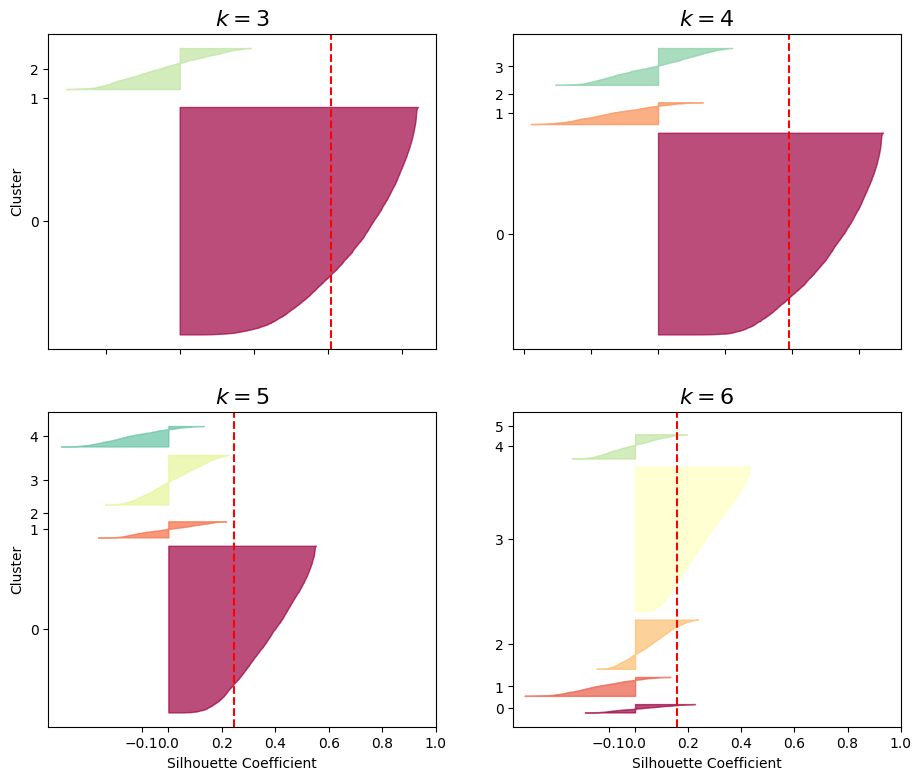

In [27]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

GUARDAR ETIQUETAS


In [28]:
# Guardar las etiquetas predichas en un archivo CSV usando Pandas
df = pd.DataFrame({'cluster_labels': y_pred})
df.to_csv('/content/gdrive/MyDrive/IA/DATASET/2.csv', index=False)

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Tamaño de la capa de entrada para una sola imagen
#input_layer_size = alto_imagen * ancho_imagen * canales_imagen

# Tamaño de la capa de entrada
input_layer_size =3072
# Número de etiquetas (depende de tu problema específico)
num_labels = 5 # Por ejemplo, si clasificas 5 tipos diferentes de imágenes

# Cargar características desde un archivo CSV
X = pd.read_csv('/content/gdrive/MyDrive/IA/DATASET/data_0.csv', delimiter=',').values

# Cargar etiquetas desde un archivo CSV
y = pd.read_csv('/content/gdrive/MyDrive/IA/DATASET/cluster_labels.csv', delimiter=',')['cluster_labels'].values

# Ajustar las etiquetas para que vayan de 0 a 6 en lugar de 1 a 7
y[y == 5] = 0
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

# Ahora puedes utilizar X_train, X_test, y_train, y y_test según tus necesidades


ValueError: Found input variables with inconsistent numbers of samples: [50000, 9864]

In [ ]:
print("Primera fila de X:")
print(X_train_norm.iloc[0, :])

print("Valores de y:")
print(y)


In [ ]:
# Normalizar las características (opcional, dependiendo de tu aplicación)
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [ ]:
# Llamar a la función de normalización con los datos de entrenamiento
X_train_norm, mu, sigma = featureNormalize(X_train)

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
X = X_train_norm

Sirve para mostrar algunas muestras aleatorias del conjunto de entrenamiento normalizado. Esto puede ser útil para visualizar cómo se ven algunas muestras después de la normalización o para verificar la distribución de las características.

In [ ]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(len(X_train_norm), 100, replace=False)
sel = X_train_norm.iloc[rand_indices, :]

# Imprimir algunas muestras seleccionadas aleatoriamente
print("Muestras seleccionadas aleatoriamente:")
print(sel)


mapea el resultado de la regresión

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

calcula el costo y el gradiente de la regresión logística regularizada

In [ ]:
def lrCostFunction(theta, X, y, lambda_):

    m = y.size

    # convierte las etiquetas a valores enteros si son booleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

oneVsAll se utiliza para entrenar clasificadores de regresión logística uno contra todos.

In [ ]:
# Entrenar clasificadores de regresión logística uno contra todos
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                 (X, (y == c),
                                  lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        all_theta[c] = res.x
    return all_theta

In [ ]:
# Entrenar los clasificadores uno contra todos
lambda_ = 0.1
all_theta = oneVsAll(X_train_norm, y_train, num_labels, lambda_)

In [ ]:
print(all_theta)

Esta función predictOneVsAll se utiliza para predecir las etiquetas utilizando los clasificadores entrenados mediante el enfoque uno contra todos en un problema de clasificación multiclase utilizando regresión logístic

In [ ]:
def predictOneVsAll(all_theta, X):

    m = X.shape[0]
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Agregar unos a la matriz de datos X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

    return p

In [ ]:
print(X.shape)

# Predecir etiquetas para el conjunto de entrenamiento
pred_train = predictOneVsAll(all_theta, X_train_norm)
accuracy_train = np.mean(pred_train == y_train) * 100
print(f"Precisión del conjunto de entrenamiento: {accuracy_train:.2f}%")

# Predecir etiquetas para el conjunto de prueba
X_test_norm = (X_test - mu) / sigma
pred_test = predictOneVsAll(all_theta, X_test_norm)
accuracy_test = np.mean(pred_test == y_test) * 100
print(f"Precisión del conjunto de prueba: {accuracy_test:.2f}%")

# Imprimir las etiquetas correspondientes a un rango de filas seleccionadas
print(y[10680:21000])

# Seleccionar un rango de filas para el conjunto de prueba
XPrueba = X.iloc[10:10600, :].copy()
print(XPrueba.shape)

# Agregar la columna de unos al conjunto de datos de prueba
XPrueba = np.concatenate([np.ones((10590, 1)), XPrueba], axis=1)
print(XPrueba.shape)

# Predecir etiquetas para el conjunto de prueba seleccionado
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis=1)
print(p)

# Imprimir las etiquetas correspondientes a un rango de filas seleccionadas
print(y[10:21000])
